#### Import relevant libraries

In [435]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api
from matplotlib import style
style.use('default')


### Input parameters

In [436]:
raw_data = pd.read_csv('D:\\National Research Council of Canada\\Testing Data\\Quasi-isotropic_organized\\QI1 bottom\\data\\QI1_preprocessed.csv')
shift_index = 11 #need to determine this from csv
gauge_length = 50 #it is always 50 mm unless told otherwise
area = 18.53 # in sq mm (from reference sheet)

#### Look for the max of the laser extensometer

In [437]:
cutoff_point = raw_data['Laser Ext mm'].max()
cutoff_point

50.981972

#### Look for the index of the max of the laser extensometer

In [438]:
cutoff_index = raw_data[raw_data['Laser Ext mm'] == cutoff_point].index.values
cutoff_index += 1
cutoff_index[0]

8048

#### Cut off the dataframe below the max of the laser extensometer

In [439]:
data = raw_data[:cutoff_index[0]]
data

,Time s,Axial Displacement mm,Axial Force N,Laser Ext mm
0,14.140625,0.102860,41.001213,50.271378
1,14.160645,0.102422,-10.625508,50.271385
2,14.180664,0.100751,42.543945,50.270435
3,14.200684,0.101653,-3.749769,50.268631
4,14.220703,0.101984,22.997656,50.269764
...,...,...,...,...
8043,175.157710,3.680603,4773.661100,50.976540
8044,175.177730,3.680352,4738.680700,50.979176
8045,175.197750,3.680600,4770.127400,50.978806
8046,175.217770,3.681544,4749.221200,50.979557


### Data cleaning

In [440]:
data.astype(float)
data = data.round(decimals = 5)

In [441]:
data['Shifted Axial Displacement mm'] = (data['Axial Displacement mm'])-(data['Axial Displacement mm'][shift_index])


In [442]:
data['Std Calculated mm/mm'] = (data['Shifted Axial Displacement mm'])/gauge_length

In [443]:
data['Axial Strain mm/mm'] = (data['Laser Ext mm']) - (data['Laser Ext mm'][shift_index])

In [444]:
data['Axial Stress MPa'] = ((data['Axial Force N'])/(area))

In [445]:
data['Laser Strain Quotient mm/mm'] = ((1-((data['Laser Ext mm'])/(gauge_length)))*100)
data

,Time s,Axial Displacement mm,Axial Force N,Laser Ext mm,Shifted Axial Displacement mm,Std Calculated mm/mm,Axial Strain mm/mm,Axial Stress MPa,Laser Strain Quotient mm/mm
0,14.14062,0.10286,41.00121,50.27138,-0.00073,-0.000015,0.00385,2.212693,-0.54276
1,14.16064,0.10242,-10.62551,50.27138,-0.00117,-0.000023,0.00385,-0.573422,-0.54276
2,14.18066,0.10075,42.54394,50.27044,-0.00284,-0.000057,0.00291,2.295949,-0.54088
3,14.20068,0.10165,-3.74977,50.26863,-0.00194,-0.000039,0.00110,-0.202362,-0.53726
4,14.22070,0.10198,22.99766,50.26976,-0.00161,-0.000032,0.00223,1.241104,-0.53952
...,...,...,...,...,...,...,...,...,...
8043,175.15771,3.68060,4773.66110,50.97654,3.57701,0.071540,0.70901,257.617976,-1.95308
8044,175.17773,3.68035,4738.68070,50.97918,3.57676,0.071535,0.71165,255.730205,-1.95836
8045,175.19775,3.68060,4770.12740,50.97881,3.57701,0.071540,0.71128,257.427275,-1.95762
8046,175.21777,3.68154,4749.22120,50.97956,3.57795,0.071559,0.71203,256.299039,-1.95912


### Data summary table

In [446]:
data_summary = statsmodels.stats.descriptivestats.describe(data, ['mean', 'std_err', 'coef_var'])
data_summary

,Time s,Axial Displacement mm,Axial Force N,Laser Ext mm,Shifted Axial Displacement mm,Std Calculated mm/mm,Axial Strain mm/mm,Axial Stress MPa,Laser Strain Quotient mm/mm
mean,94.689209,1.935989,2872.204373,50.688187,1.832399,0.036648,0.420657,155.002934,-1.376375
std_err,0.005779,0.000125,0.170098,0.000026,0.000125,0.000003,0.000026,0.009180,0.000052
coef_var,0.491222,0.521104,0.476619,0.004089,0.550563,0.550563,0.492770,0.476619,-0.301208


## Plot the data

### Plot #1 
Force vs. Displacement

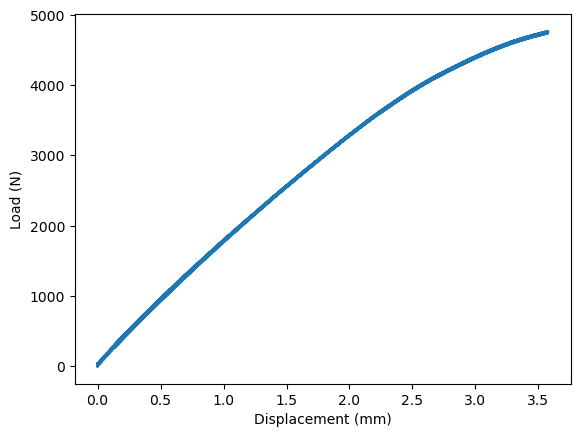

In [454]:
x = data['Shifted Axial Displacement mm']
y = data['Axial Force N']
plt.xlabel('Displacement (mm)')
plt.ylabel('Load (N)')
plt.plot(x,y)

plt.savefig('D:\\National Research Council of Canada\\Testing Data\\Quasi-isotropic_organized\\QI1 bottom\\QI1bottom_force_v_displacement.png', dpi = 300)


## Plot #2
Stress v. Strain

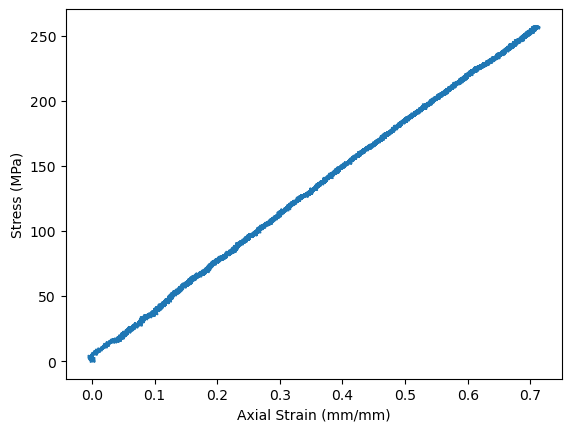

In [455]:
x = data['Axial Strain mm/mm']
y = data['Axial Stress MPa']
plt.xlabel('Axial Strain (mm/mm)')
plt.ylabel('Stress (MPa)')
plt.plot(x,y)
plt.savefig('D:\\National Research Council of Canada\\Testing Data\\Quasi-isotropic_organized\\QI1 bottom\\QI1bottom_stress_v_axialstrain.png', dpi = 300)

### Find the trendline and Elastic Modulus

In [449]:
z = np.polyfit(x,y,1)
elastic_modulus = z[0]
print('The elastic modulus is = ' + str(elastic_modulus))
p = np.poly1d(z)
#the equation of the line
print("y = %.6fx+(%.6f)"%(z[0],z[1]))

The elastic modulus is = 356.2941584527795
y = 356.294158x+(5.125174)


In [450]:
data_summary['Elastic Modulus'] = elastic_modulus
data_summary['Ultimate Tensile Strength'] = data['Axial Stress MPa'].max()
data_summary

,Time s,Axial Displacement mm,Axial Force N,Laser Ext mm,Shifted Axial Displacement mm,Std Calculated mm/mm,Axial Strain mm/mm,Axial Stress MPa,Laser Strain Quotient mm/mm,Elastic Modulus,Ultimate Tensile Strength
mean,94.689209,1.935989,2872.204373,50.688187,1.832399,0.036648,0.420657,155.002934,-1.376375,356.294158,257.617976
std_err,0.005779,0.000125,0.170098,0.000026,0.000125,0.000003,0.000026,0.009180,0.000052,356.294158,257.617976
coef_var,0.491222,0.521104,0.476619,0.004089,0.550563,0.550563,0.492770,0.476619,-0.301208,356.294158,257.617976


## Plot #3
Stress v. calculated strain 
find elastic modulus with calculated strain

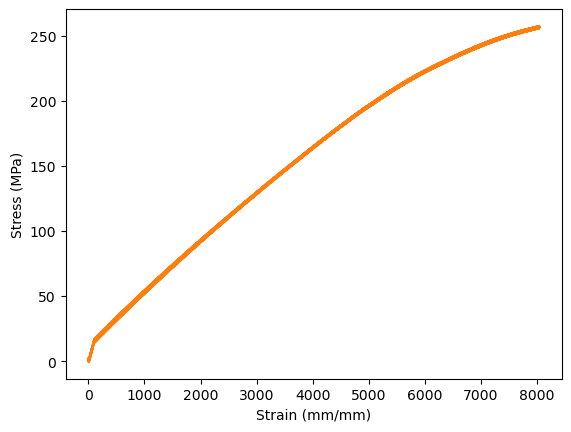

In [462]:
x1 = data['Std Calculated mm/mm']
x2 = data['Axial Strain mm/mm']
y = data['Axial Stress MPa']
plt.xlabel('Strain (mm/mm)')
plt.ylabel('Stress (MPa)')
plt.plot(x1,x2,y)
plt.savefig('D:\\National Research Council of Canada\\Testing Data\\Quasi-isotropic_organized\\QI1 bottom\\QIbottom_strains_v_stress.png', dpi = 300)

## Write out to csv

In [451]:
data.to_csv('D:\\National Research Council of Canada\\Testing Data\\Quasi-isotropic_organized\\QI1 bottom\\QI1bottom_cleaned_data.csv')
data_summary.to_csv('D:\\National Research Council of Canada\\Testing Data\\Quasi-isotropic_organized\\QI1 bottom\\QI1bottom_Summary_Table.csv')

## Plot #3
Displacement vs. Strain

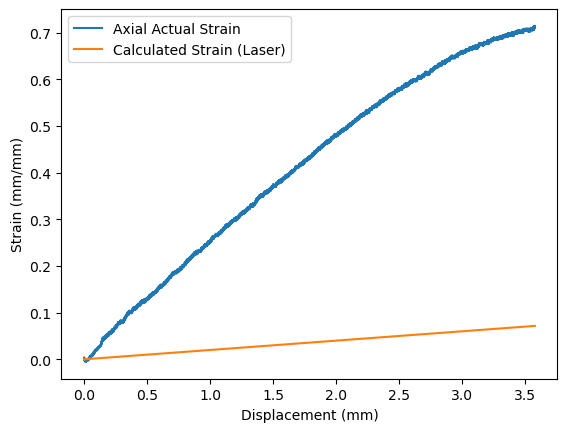

In [452]:
x1 = data['Shifted Axial Displacement mm']
y1 = data['Axial Strain mm/mm']
y2 = data['Std Calculated mm/mm']
plt.xlabel('Displacement (mm)')
plt.ylabel('Strain (mm/mm)')
plt.grid(False)
plt.plot(x1,y1, label = 'Axial Actual Strain')
plt.plot(x1,y2, label = 'Calculated Strain (Laser)')
plt.legend()
plt.savefig('D:\\National Research Council of Canada\\Testing Data\\Quasi-isotropic_organized\\QI1 bottom\\QI1bottom_displacement_strain.png', dpi = 300)

## Plot #4
Calculated strain vs. stress

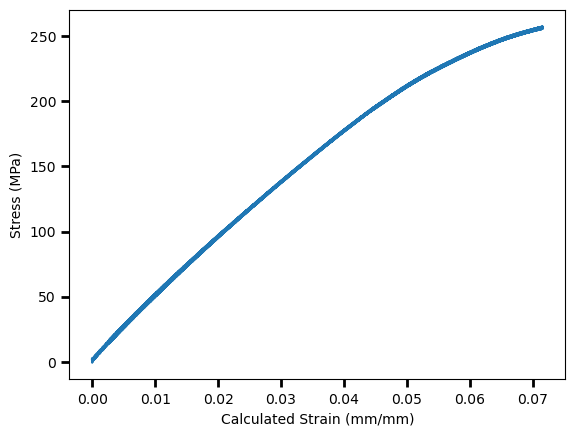

In [453]:
x = data['Std Calculated mm/mm']
y = data['Axial Stress MPa']
plt.xlabel('Calculated Strain (mm/mm)')
plt.ylabel('Stress (MPa)')
plt.plot(x,y)
plt.tick_params(direction = 'out', length = 6, width = 2, colors = 'black')
plt.savefig('D:\\National Research Council of Canada\\Testing Data\\Quasi-isotropic_organized\\QI1 bottom\\QI1bottom_calc_strain_stress.png', dpi = 300)
